<a href="https://colab.research.google.com/github/nurfnick/COVID_Travel/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression and Correlation

I am wonding if I can show that travel activity in a county is a leading indicator in COVID cases.  
I would like to try and create a correlation between the number of covid cases on each day and the travel as reported by google.  I'll have to iterate over several days prior.  My hypothesis is increased travel 14 days ahead should correlate to a spike in COVID cases.

### Data Wrangling

First I'll import my data sets and get them organized.

In [2]:
import pandas as pd
import numpy as np


COVID = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv',
                   dtype={"UID": str,"code3": str})
travel = pd.read_csv('https://raw.githubusercontent.com/nurfnick/COVID_Travel/master/google_mobility_US_only.csv')

In [28]:
COVID

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,151,151,152,152,152,154,154,154,154,154,154,165,165,165,166,166,167,170,171,172,172,172,175,175,177,179,179,179,179,179,180,180,183,183,183,183,185,186,188,192
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,16,19,19,19,19,19,21,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,22,23,24,26,26,26,27,28,30,30,30,30,30,30,30,30,30,30
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,"Puerto Rico, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2198,2256,2299,2329,2427,2542,2589,2646,2710,2805,2866,2913,3030,3100,3189,3260,3324,3397,3486,3647,3718,3776,3873,3935,4023,4508,4620,4915,4985,5046,5185,5329,5352,5536,5690,5811,5890,5951,6003,6111
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,"Virgin Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,70,70,70,71,71,71,71,71,71,72,72,72,72,72,72,72,73,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3256,84070016,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,"Central Utah, Utah, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,28,28,28,29,29,29,29,30,30,30,31,32,34,33,33,33,33,33,34,38,38,38,38,38,39,39,42,45,46,51,48,50,54,61,70,75,77,79,81,81
3257,84070017,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,"Southeast Utah, Utah, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13,14,13,13,13,13,14,14,15,16,16,17,18,18,20,21,21,23,23,23,24,24,24,26,26,26,26,26,26,26,28,28,28,28,29,29,29,29,29,30
3258,84070018,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,"Southwest Utah, Utah, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,164,170,167,180,187,200,209,219,236,245,260,271,281,294,305,324,330,335,360,386,423,440,454,476,498,524,554,584,616,637,655,680,718,739,780,806,827,855,889,919
3259,84070019,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,"TriCounty, Utah, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,16,16,16,16,16,16,19,19,22,19,20,20,21,20,20,20,20,20,20,18,20,21,21,20,20,20,20,20,22,22,22,23,27,27,29,30,30,31,33,33


In [29]:
travel[200:220]

,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
200,US,United States,Alabama,NaN,US-AL,NaN,5/4/2020,-11.0,6.0,25.0,-15.0,-33.0,11.0
201,US,United States,Alabama,NaN,US-AL,NaN,5/5/2020,-12.0,9.0,16.0,-14.0,-33.0,12.0
202,US,United States,Alabama,NaN,US-AL,NaN,5/6/2020,-11.0,8.0,33.0,-11.0,-34.0,12.0
203,US,United States,Alabama,NaN,US-AL,NaN,5/7/2020,-15.0,8.0,33.0,-12.0,-34.0,12.0
204,US,United States,Alabama,NaN,US-AL,NaN,5/8/2020,-22.0,1.0,-1.0,-17.0,-35.0,15.0
205,US,United States,Alabama,NaN,US-AL,NaN,5/9/2020,-15.0,20.0,39.0,-3.0,-18.0,5.0
206,US,United States,Alabama,NaN,US-AL,NaN,5/10/2020,-19.0,13.0,53.0,-10.0,-23.0,4.0
207,US,United States,Alabama,NaN,US-AL,NaN,5/11/2020,-11.0,1.0,33.0,-8.0,-31.0,10.0
208,US,United States,Alabama,NaN,US-AL,NaN,5/12/2020,-9.0,4.0,28.0,-9.0,-30.0,11.0
209,US,United States,Alabama,NaN,US-AL,NaN,5/13/2020,-5.0,5.0,46.0,-8.0,-31.0,10.0


In [30]:
fips = [x for x in np.unique(travel['census_fips_code']) if ~np.isnan(x)] #get the unique fips and get rid of nans
dates = np.unique(travel['date']) #setting the list of dates

COVID = COVID[COVID['FIPS'].isin(fips)] #remove all the extra statewide crap
travel = travel[travel['census_fips_code'].isin(fips)]

In [31]:
nptravel = np.array(travel)

In [33]:

for date in dates:
  datelist = []
  for fip in fips:
    if nptravel[(nptravel[:,6]==date) & (nptravel[:,5]==fip)].size==0:
      datelist.append(float('nan'))
    else:
      datelist.append(nptravel[(nptravel[:,6]==date) & (nptravel[:,5]==fip)][0,-2])
  COVID["Travel {}".format(date)]=datelist
  print(date)
    


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


2/15/2020
2/16/2020
2/17/2020
2/18/2020
2/19/2020
2/20/2020
2/21/2020
2/22/2020
2/23/2020
2/24/2020
2/25/2020
2/26/2020
2/27/2020
2/28/2020
2/29/2020
3/1/2020
3/10/2020
3/11/2020
3/12/2020
3/13/2020
3/14/2020
3/15/2020
3/16/2020
3/17/2020
3/18/2020
3/19/2020
3/2/2020
3/20/2020
3/21/2020
3/22/2020
3/23/2020
3/24/2020
3/25/2020
3/26/2020
3/27/2020
3/28/2020
3/29/2020
3/3/2020
3/30/2020
3/31/2020
3/4/2020
3/5/2020
3/6/2020
3/7/2020
3/8/2020
3/9/2020
4/1/2020


KeyboardInterrupt: ignored

In [35]:
COVID.to_csv("COVID.csv")#got bored of watching it run, wanted to checkpoint it.

In [39]:
newdates = dates[47:]


for date in newdates:
  datelist = []
  for fip in fips:
    if nptravel[(nptravel[:,6]==date) & (nptravel[:,5]==fip)].size==0:
      datelist.append(float('nan'))
    else:
      datelist.append(nptravel[(nptravel[:,6]==date) & (nptravel[:,5]==fip)][0,-2])
  COVID["Travel {}".format(date)]=datelist
  print(date)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


4/10/2020
4/11/2020
4/12/2020
4/13/2020
4/14/2020
4/15/2020
4/16/2020
4/17/2020
4/18/2020
4/19/2020
4/2/2020
4/20/2020
4/21/2020
4/22/2020
4/23/2020
4/24/2020
4/25/2020
4/26/2020
4/27/2020
4/28/2020
4/29/2020
4/3/2020
4/30/2020
4/4/2020
4/5/2020
4/6/2020
4/7/2020
4/8/2020
4/9/2020
5/1/2020
5/10/2020
5/11/2020
5/12/2020
5/13/2020
5/14/2020
5/15/2020
5/16/2020
5/17/2020
5/18/2020
5/19/2020
5/2/2020
5/20/2020
5/21/2020
5/22/2020
5/23/2020
5/24/2020
5/25/2020
5/26/2020
5/27/2020
5/28/2020
5/29/2020
5/3/2020
5/30/2020
5/31/2020
5/4/2020
5/5/2020
5/6/2020
5/7/2020
5/8/2020
5/9/2020
6/1/2020
6/10/2020
6/11/2020
6/12/2020
6/13/2020
6/14/2020
6/2/2020
6/3/2020
6/4/2020
6/5/2020
6/6/2020
6/7/2020
6/8/2020
6/9/2020


In [40]:
COVID.to_csv("COVID.csv")#not sure why this moved so dang slow!

In [41]:
#I tried this code a bunh of ways to improve the speed.  Not certain why it moved so slow.  Don't run these again just the next code line!
#master=[]
#for date in dates:
 #   datelist=[]
  #  for fip in fips:
   #   df = travel[ (travel['date']== date) & (travel['census_fips_code']==fip)]
    #  if df.empty:
     #   datelist.append(float('nan'))
      #else:
       # datelist.append(df.iloc[0]['workplaces_percent_change_from_baseline'])
    #master.append(datelist)
    #COVID.loc[:,'Travel {}'.format(date)]=datelist


#too slow!






In [42]:
COVID.corr()

,FIPS,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,...,Travel 5/14/2020,Travel 5/15/2020,Travel 5/16/2020,Travel 5/17/2020,Travel 5/18/2020,Travel 5/19/2020,Travel 5/2/2020,Travel 5/20/2020,Travel 5/21/2020,Travel 5/22/2020,Travel 5/23/2020,Travel 5/24/2020,Travel 5/25/2020,Travel 5/26/2020,Travel 5/27/2020,Travel 5/28/2020,Travel 5/29/2020,Travel 5/3/2020,Travel 5/30/2020,Travel 5/31/2020,Travel 5/4/2020,Travel 5/5/2020,Travel 5/6/2020,Travel 5/7/2020,Travel 5/8/2020,Travel 5/9/2020,Travel 6/1/2020,Travel 6/10/2020,Travel 6/11/2020,Travel 6/12/2020,Travel 6/13/2020,Travel 6/14/2020,Travel 6/2/2020,Travel 6/3/2020,Travel 6/4/2020,Travel 6/5/2020,Travel 6/6/2020,Travel 6/7/2020,Travel 6/8/2020,Travel 6/9/2020
FIPS,1.000000,0.102040,0.100339,0.027956,0.027956,0.008219,0.008219,-0.035990,-0.035990,-0.035990,-0.035990,-0.035990,-0.042217,-0.042115,-0.042115,-0.054021,-0.054021,-0.054021,-0.054021,-0.054021,-0.054021,-0.054021,-0.054021,-0.059543,-0.059543,-0.061641,-0.061641,-0.061641,-0.061641,-0.061641,-0.061641,-0.061641,-0.061641,-0.071385,-0.071385,-0.071385,-0.071385,-0.071385,-0.071385,-0.072999,...,-0.041204,-0.061267,-0.022937,0.067263,-0.049121,-0.073332,-0.008038,-0.076772,-0.073298,-0.080357,0.049157,0.062633,-0.014308,-0.031684,-0.044431,-0.047893,-0.061308,0.050702,0.033989,0.082515,-0.039656,-0.038572,-0.044897,-0.028164,-0.043689,0.001496,-0.035478,-0.049426,-0.060101,-0.067770,0.015345,0.075838,-0.038934,-0.043929,-0.041280,-0.065065,0.059042,0.137939,-0.019307,-0.045112
Lat,0.102040,1.000000,-0.199542,0.034951,0.034951,0.034491,0.034491,-0.000076,-0.000076,-0.000076,-0.000076,-0.000076,0.003410,0.008185,0.008185,0.002642,0.002642,0.002642,0.002642,0.002642,0.002642,0.002642,0.002642,-0.001945,-0.001945,-0.005979,-0.005979,-0.005979,-0.005979,-0.005979,-0.005979,-0.005979,-0.005979,-0.003484,-0.003484,-0.003484,-0.003484,-0.003484,-0.003484,-0.003054,...,-0.191035,-0.158127,-0.135748,-0.082650,-0.185490,-0.178823,-0.208369,-0.157249,-0.181369,-0.185664,-0.188073,-0.057140,-0.392061,-0.139337,-0.116736,-0.135807,-0.092364,-0.059136,-0.031321,0.142633,-0.196794,-0.190074,-0.176683,-0.201227,-0.146471,-0.216699,-0.095496,-0.053450,-0.064984,-0.040733,0.094436,0.279803,-0.111365,-0.073534,-0.084663,-0.061225,0.084955,0.281939,-0.022712,-0.079908
Long_,0.100339,-0.199542,1.000000,-0.047016,-0.047016,-0.029597,-0.029597,-0.070168,-0.070168,-0.070168,-0.070168,-0.070168,-0.066194,-0.053045,-0.053045,-0.074314,-0.074314,-0.074314,-0.074314,-0.074314,-0.074314,-0.074314,-0.074314,-0.081482,-0.081482,-0.084002,-0.084002,-0.084002,-0.084002,-0.084002,-0.084002,-0.084002,-0.084002,-0.100425,-0.100425,-0.100425,-0.100425,-0.100425,-0.100425,-0.103541,...,-0.096224,-0.161844,0.032500,0.018442,-0.142274,-0.126702,0.034321,-0.149731,-0.112149,-0.158971,0.051798,0.038354,-0.133370,-0.118246,-0.139045,-0.098752,-0.157026,0.017865,0.111561,0.080400,-0.153334,-0.148797,-0.151988,-0.112049,-0.182198,-0.022807,-0.106631,-0.116686,-0.058852,-0.101421,0.141439,0.111735,-0.084471,-0.108449,-0.071184,-0.119476,0.085934,0.093413,-0.091382,-0.075184
1/22/20,0.027956,0.034951,-0.047016,1.000000,1.000000,0.706982,0.706982,0.446898,0.446898,0.446898,0.446898,0.446898,0.332888,0.315747,0.315747,0.241940,0.241940,0.241940,0.241940,0.241940,0.241940,0.241940,0.241940,0.235077,0.235077,0.217564,0.217564,0.217564,0.217564,0.217564,0.217564,0.217564,0.217564,0.207806,0.207806,0.207806,0.207806,0.207806,0.207806,0.195383,...,-0.062260,-0.061212,-0.050746,-0.036480,-0.064499,-0.066491,-0.051255,-0.066727,-0.066938,-0.063903,-0.043416,-0.036309,-0.037360,-0.069610,-0.069368,-0.067660,-0.066607,-0.040192,-0.058479,-0.045282,-0.061129,-0.062188,-0.062508,-0.060917,-0.059799,-0.043547,-0.072349,-0.073046,-0.0

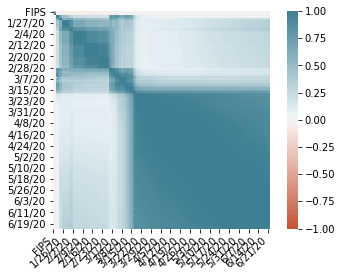

In [7]:
import seaborn as sns

corr = COVID.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [51]:
corr.to_csv('correlation.csv')

In [9]:
corr = pd.read_csv('https://raw.githubusercontent.com/nurfnick/COVID_Travel/master/correlation.csv')
COVID = pd.read_csv('https://raw.githubusercontent.com/nurfnick/COVID_Travel/master/COVID(1).csv')

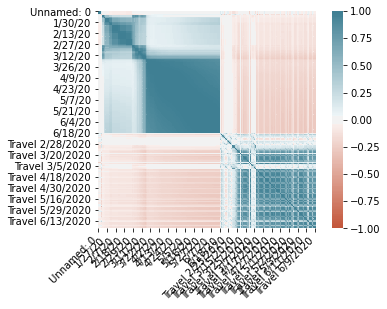

In [10]:
import seaborn as sns

corr = COVID.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

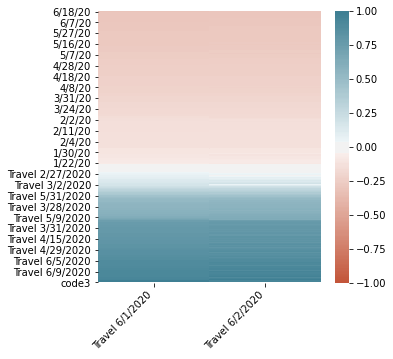

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt


corr = COVID.corr()
plt.figure(figsize=(5,5))
ax = sns.heatmap(
    corr[['Travel 6/1/2020','Travel 6/2/2020']].sort_values(by=['Travel 6/1/2020']), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=False
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

'Travel 6/1/2020'